#Space X Falcon 9 First Stage Landing Prediction
Assignment: Machine Learning Prediction
Estimated time needed: 60 minutes

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.



Several examples of an unsuccessful landing are shown here:
Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.

Objectives
Perform exploratory Data Analysis and determine Training Labels

create a column for the class
Standardize the data
Split into training data and test data
-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

Find the method performs best using test data



##Import Libraries and Define Auxiliary Functions
We will import the following libraries for the lab

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import plot_tree
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import svm
from sklearn import metrics
import sklearn.tree as tree

In [3]:
#This function is to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')


X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


#TASK 1
Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [6]:
Y = data['Class'].to_numpy()
#len(Y)
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#TASK 2
Standardize the data in X then reassign it to the variable X using the transform provided below.

In [7]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

#TASK 3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [9]:
Y_test.shape

(18,)

In [10]:
X_train.shape

(72, 83)

#TASK 4
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

##Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [12]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
  for C in (0.01, 0.1, 0.001, 0.2, 0.5, 1, 10, 100): # method 2 to find out the best model
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, Y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print(f'When Solver is {k} and C is {C}, logloss is : {log_loss(Y_test, y_prob):.3f}') # we can see score only correlate the sovler, not correlate c
    

When Solver is lbfgs and C is 0.01, logloss is : 0.479
When Solver is lbfgs and C is 0.1, logloss is : 0.479
When Solver is lbfgs and C is 0.001, logloss is : 0.479
When Solver is lbfgs and C is 0.2, logloss is : 0.479
When Solver is lbfgs and C is 0.5, logloss is : 0.479
When Solver is lbfgs and C is 1, logloss is : 0.479
When Solver is lbfgs and C is 10, logloss is : 0.479
When Solver is lbfgs and C is 100, logloss is : 0.479
When Solver is saga and C is 0.01, logloss is : 0.479
When Solver is saga and C is 0.1, logloss is : 0.479
When Solver is saga and C is 0.001, logloss is : 0.479
When Solver is saga and C is 0.2, logloss is : 0.479
When Solver is saga and C is 0.5, logloss is : 0.479
When Solver is saga and C is 1, logloss is : 0.479
When Solver is saga and C is 10, logloss is : 0.479
When Solver is saga and C is 100, logloss is : 0.479
When Solver is liblinear and C is 0.01, logloss is : 0.514
When Solver is liblinear and C is 0.1, logloss is : 0.514
When Solver is liblinear an

In [13]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train) # we can see solver= 'libinear' is best. and C can be 0.01
LR

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
yhat1 = LR.predict(X_test)

In [15]:
yhat1_prob = LR.predict_proba(X_test)


In [16]:
f1_score(Y_test, yhat1, average='weighted')

0.7835497835497836

In [17]:
metrics.accuracy_score(Y_test, yhat1) # jaccard_scor 

0.7777777777777778

In [18]:
from sklearn.metrics import log_loss  # we hope log_loss is bigger, the pridect more accuracy
log_loss(Y_test, yhat1_prob)

0.5139876008285368

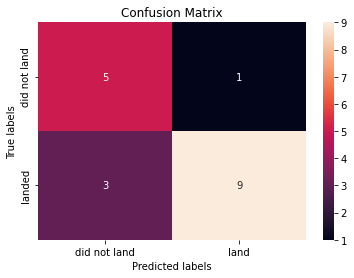

In [19]:
plot_confusion_matrix(Y_test, yhat1)

In [23]:
# define hyperparameters to tune 
parameters_lr ={"C":[0.01,0.1,1],
             'penalty':['l2'], 
             'solver':['lbfgs']}# l1 lasso l2 ridge

# define the model
lr = LogisticRegression(random_state = 12345)

# define the grid search object
grid_search_lr = GridSearchCV(
    estimator = lr,
    param_grid = parameters_lr,
    scoring = 'accuracy',
    cv = 10
)
# execute search
LR_cv = grid_search_lr.fit(X_train,Y_train)

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [24]:
print("tuned hyperparameters :(best parameters) ",LR_cv.best_params_)
print("accuracy :", LR_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


#TASK 5
Calculate the accuracy on the test data using the method score:

In [27]:
print('Accuracy on test data is: {:.3f}'.format(LR_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


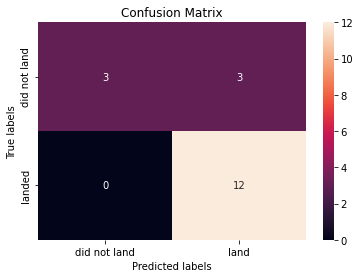

In [28]:
yhat1 = LR_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat1)

#TASK 6 SVM
Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

In [29]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,Y_train)
    svm_yhat = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(Y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.6666666666666666
For kernel: poly, the f1 score is: 0.5333333333333334
For kernel: rbf, the f1 score is: 0.764102564102564
For kernel: sigmoid, the f1 score is: 0.8148148148148149


In [30]:
clf = svm.SVC(kernel='sigmoid')   # we can see kernel='sigmoid' is best
clf.fit(X_train, Y_train) 

SVC(kernel='sigmoid')

In [31]:
yhat2=clf.predict(X_test)


In [32]:
f1_score(Y_test, yhat2, average='weighted') 

0.8148148148148149

In [33]:
metrics.accuracy_score(Y_test, yhat2)

0.8333333333333334

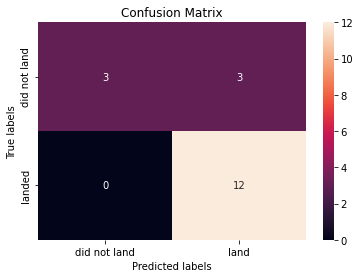

In [34]:
plot_confusion_matrix(Y_test, yhat2)

In [36]:
# define hyperparameters to tune 
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# define the model
svm = SVC(random_state = 12345)

# define the grid search object
grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = parameters_svm,
    scoring = 'accuracy',
    cv = 10
)
# execute search
svm_model = grid_search_svm.fit(X_train,Y_train)

In [37]:
print("tuned hyperparameters :(best parameters) ",svm_model.best_params_)
print("accuracy :",svm_model.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


#TASK 7
Calculate the accuracy on the test data using the method score:

In [ ]:
print('Accuracy on test data is: {:.3f}'.format(svm_cv.score(X_test, Y_test)))


Accuracy on test data is: 0.833


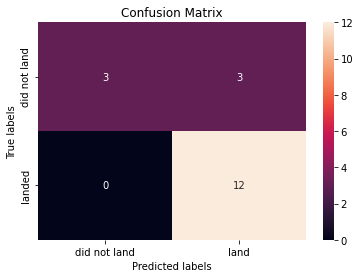

In [38]:
yhat2= svm_model.predict(X_test)
plot_confusion_matrix(Y_test, yhat2)

#TASK 8 Decision Tree Classifier
Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [39]:
max_depth=8

for i in range(1,max_depth):
    loanpaidTree = DecisionTreeClassifier(criterion="entropy", max_depth = i )  # how to find the best max_depth??
     # it shows the default parameters
    loanpaidTree.fit(X_train,Y_train)
    predTree = loanpaidTree.predict(X_test)
    j=metrics.accuracy_score(Y_test, predTree)
    k=[]
    k.append(j)
    
    #print("DecisionTrees's Accuracy: ", k)
    print(k) # max_deth=5 is best. accuracy=0.944

[0.8333333333333334]
[0.8333333333333334]
[0.8333333333333334]
[0.8333333333333334]
[0.7777777777777778]
[0.8333333333333334]
[0.7777777777777778]


In [44]:
loanpaidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5 )  # k=6 is the best 5th row accuracy is hightest
loanpaidTree.fit(X_train,Y_train)
predTree = loanpaidTree.predict(X_test)
metrics.accuracy_score(Y_test, predTree)

0.9444444444444444

In [45]:
f1_score(Y_test, predTree, average='weighted') #predTree replace yhat2

0.9430303030303031

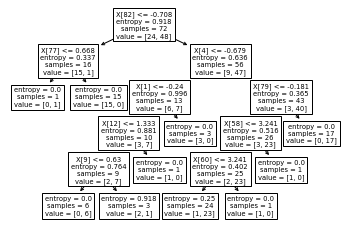

In [46]:
tree.plot_tree(loanpaidTree)
plt.show()

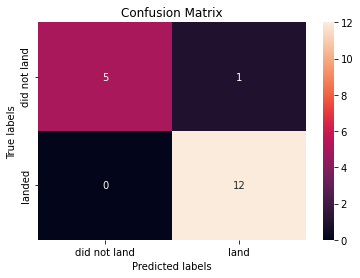

In [47]:
plot_confusion_matrix(Y_test, predTree)

In [51]:
# define hyperparameters to tune 
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# define the model
tree = DecisionTreeClassifier(random_state = 12345)

# define the grid search object
grid_search_tree = GridSearchCV(
    estimator = tree,
    param_grid = parameters_tree,
    scoring = 'accuracy',
    cv = 10
)
# execute search
tree_model = grid_search_tree.fit(X_train, Y_train)

In [52]:
print("tuned hyperparameters :(best parameters) ",tree_model.best_params_)
print("accuracy :",tree_model.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8732142857142856


#TASK 9
Calculate the accuracy of tree_cv on the test data using the method score:

In [ ]:
print('Accuracy on test data is: {:.3f}'.format(tree_model.score(X_test, Y_test)))


Accuracy on test data is: 0.833


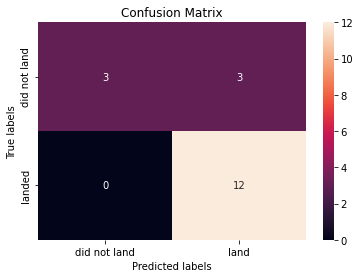

In [53]:
predTree= tree_model.predict(X_test)
plot_confusion_matrix(Y_test, predTree)

#TASK 10 KNN ~K earest neighbors
Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [54]:
Ks = 60
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

In [55]:
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7777777777777778 with k= 3


In [61]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat4=neigh.predict(X_test)

In [62]:
f1_score(Y_test, yhat4, average='weighted') 

0.738095238095238

In [63]:
metrics.accuracy_score(Y_test, yhat4) # jaccard_score

0.7777777777777778

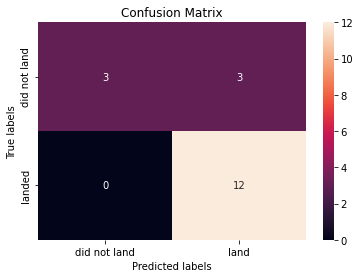

In [64]:
plot_confusion_matrix(Y_test, predTree)

In [67]:
# define hyperparameters to tune
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# define the model
knn = KNeighborsClassifier()

# define the grid search object
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters_knn,
    scoring = 'accuracy',
    cv = 10
)
# execute search
knn_model = grid_search_knn.fit(X_train, Y_train)

In [68]:
print("tuned hyperparameters :(best parameters) ",knn_model.best_params_)
print("accuracy :",knn_model.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


#TASK 11
Calculate the accuracy of knn_cv on the test data using the method score:

In [ ]:
print('Accuracy on test data is: {:.3f}'.format(knn_model.score(X_test, Y_test)))

Accuracy on test data is: 0.833


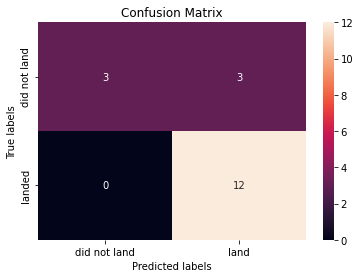

In [69]:
yhat4 = knn_model.predict(X_test)
plot_confusion_matrix(Y_test, yhat4)

#TASK 12
Find the method performs best:

In [70]:
models = {'KNeighbors':knn_model.best_score_,
              'DecisionTree':tree_model.best_score_,
              'LogisticRegression':LR_cv.best_score_,
              'SupportVector': svm_model.best_score_}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_model.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_model.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', LR_cv.best_params_)
if bestalgorithm == 'SupportVector':
    print('Best params is :', svm_model.best_params_)

Best model is DecisionTree with a score of 0.8732142857142856
Best params is : {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
